# Imports

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import phonecalls as pc
import time
import copy
import os


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']

# Getting Data

In [2]:
%time mit_calls = pc.allcalls('CallLog.csv', (), 'participantID.A', 'number.hash', ['local_time'], "%Y-%m-%d %H:%M:%S", header=True, min_activity=1)
mit_calls.head()

CPU times: user 468 ms, sys: 17.8 ms, total: 486 ms
Wall time: 517 ms


,ego,alter,time,uclock,aclock
0,fa10-01-19,10153fa58c24d1a2eb54b3c6ac39482acb61131c,2010-12-31 16:44:24,307,0
1,fa10-01-22,101b96d65031e2792acd950125d90cf9ff30b5ac,2011-05-23 20:59:05,450,0
2,fa10-01-12,1023b616632f3ba048b2f1d1374788bfa0444a8d,2011-01-22 14:01:07,328,0
3,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,2011-05-27 17:52:56,454,0
4,fa10-01-07,102cd812edb5689302bcc57df8330cff44727bd1,2011-04-04 10:02:50,400,0


In [3]:
%time mit_pairs = pc.pairs(mit_calls)
mit_pairs.head()

CPU times: user 37.7 ms, sys: 0 ns, total: 37.7 ms
Wall time: 37.3 ms


,ego,alter,nij,k,n
0,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,1,516,3339
1,fa10-01-01,abac98a7f6c000a6600c0e9cc370b059a874c3fd,1,516,3339
2,fa10-01-01,b8bc40aefbb724dfbacb3fd296cbb10b2dd35a85,6,516,3339
3,fa10-01-01,b8b0f0fc34d4201df3ebb5ebcefbbb61a3499941,1,516,3339
4,fa10-01-01,b8af4e561030e5a28b441467ede33b9450dd8518,1,516,3339


In [4]:
%time mit_lives = pc.lives_dictionary(mit_calls)
# just to show how an entry looks like
mit_lives['fa10-01-01']['102c517fc9ecf84975448470893c3799f5588c8a']

CPU times: user 150 ms, sys: 833 µs, total: 151 ms
Wall time: 152 ms


{'t0': 454, 'tf': 454, 'nij': 1, 'ell': 0}

In [5]:
%time mit_calls = pc.remove_alters(mit_calls, mit_lives, 210) # only keep alters and phone calls appeared after 7 months, counting from the start of the data
mit_calls.head()

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['uclock'] -= num_days


CPU times: user 2.19 s, sys: 10.1 ms, total: 2.2 s
Wall time: 2.2 s


,ego,alter,time,uclock,aclock
0,fa10-01-19,10153fa58c24d1a2eb54b3c6ac39482acb61131c,2010-12-31 16:44:24,97,0
1,fa10-01-22,101b96d65031e2792acd950125d90cf9ff30b5ac,2011-05-23 20:59:05,240,0
2,fa10-01-12,1023b616632f3ba048b2f1d1374788bfa0444a8d,2011-01-22 14:01:07,118,0
3,fa10-01-01,102c517fc9ecf84975448470893c3799f5588c8a,2011-05-27 17:52:56,244,0
4,fa10-01-07,102cd812edb5689302bcc57df8330cff44727bd1,2011-04-04 10:02:50,190,0


In [6]:
%time mit_pairs = pc.pairs(mit_calls)
%time mit_lives = pc.lives_dictionary(mit_calls)

CPU times: user 27 ms, sys: 147 µs, total: 27.1 ms
Wall time: 26.2 ms
CPU times: user 116 ms, sys: 0 ns, total: 116 ms
Wall time: 116 ms


In [7]:
%time uk_calls = pc.allcalls("../ukdata/collected_dunbar_calls_v3_e26OK_sorted.csv", (3, 'call'), 1, 2, [6,7], '%d/%m/%y %H:%M', header=False, min_activity=1)
uk_calls.head()

CPU times: user 592 ms, sys: 35.3 ms, total: 627 ms
Wall time: 658 ms


,ego,alter,time,uclock,aclock
0,C07814508939,C0020165636994,2008-02-07 16:18:00,339,0
1,C07814508939,C0020165636994,2008-02-07 17:11:00,339,0
2,C07814508939,C0020165636994,2008-02-20 15:39:00,352,13
3,C07792658311,C0021213487966,2008-02-27 17:01:00,359,0
4,C07792658311,C0021213487966,2008-02-27 17:55:00,359,0


In [8]:
%time uk_pairs = pc.pairs(uk_calls)
%time uk_lives = pc.lives_dictionary(uk_calls)

CPU times: user 22.1 ms, sys: 0 ns, total: 22.1 ms
Wall time: 21.3 ms
CPU times: user 64.3 ms, sys: 8 µs, total: 64.3 ms
Wall time: 64.6 ms


In [9]:
tmp = uk_calls.copy(deep=True)
rmalter = {}
for ego in uk_lives.keys():
    rmalter[ego] = []
    for alter in uk_lives[ego].keys():
        if uk_lives[ego][alter]['t0'] < 180:
            rmalter[ego].append(alter)
            
for i in tmp.index:
    ego = tmp.at[i, 'ego']
    alter = tmp.at[i, 'alter']
    if alter in rmalter[ego]:
        tmp.at[i, 'rm'] = 1
    else:
        tmp.at[i, 'rm'] = 0
        
tmp2 = tmp.loc[tmp['rm'] == 0]
tmp2 = tmp2.loc[tmp2['uclock'] >= 180]
tmp2['uclock'] -= 180
tmp2.to_csv("tmp2.csv")
%time uk2_calls = pc.allcalls("tmp2.csv", (), 'ego', 'alter', ['time'], '%Y-%m-%d %H:%M:%S')
os.system("rm tmp2.csv")
uk1_calls = tmp.loc[tmp['rm'] == 1]
uk1_calls.drop(columns=['rm'], inplace=True)

CPU times: user 95.2 ms, sys: 0 ns, total: 95.2 ms
Wall time: 95.2 ms


/home/vsvh/.local/lib/python3.9/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
tmp['rm'].value_counts()

1.0    75924
0.0    31618
Name: rm, dtype: int64

In [11]:
len(uk2_calls)

31618

In [12]:
uk1_pairs = pc.pairs(uk1_calls)
uk2_pairs = pc.pairs(uk2_calls)

uk1_lives = pc.lives_dictionary(uk1_calls)
uk2_lives = pc.lives_dictionary(uk2_calls)

# Get $F$

This is a required step to obtain $b$

In [13]:
%time mit_f = pc.get_f(mit_calls, 'all', 180, 60)

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


CPU times: user 22.1 s, sys: 24.7 ms, total: 22.2 s
Wall time: 22.2 s


# From $F$ to $b$

In [16]:
%time mit_b = pc.get_b(mit_f, 'lambda')
%time mit_bplot = pc.plot_g(mit_b, 'lambda')

CPU times: user 2.46 s, sys: 36.4 ms, total: 2.5 s
Wall time: 2.5 s
CPU times: user 19.3 ms, sys: 0 ns, total: 19.3 ms
Wall time: 19.2 ms


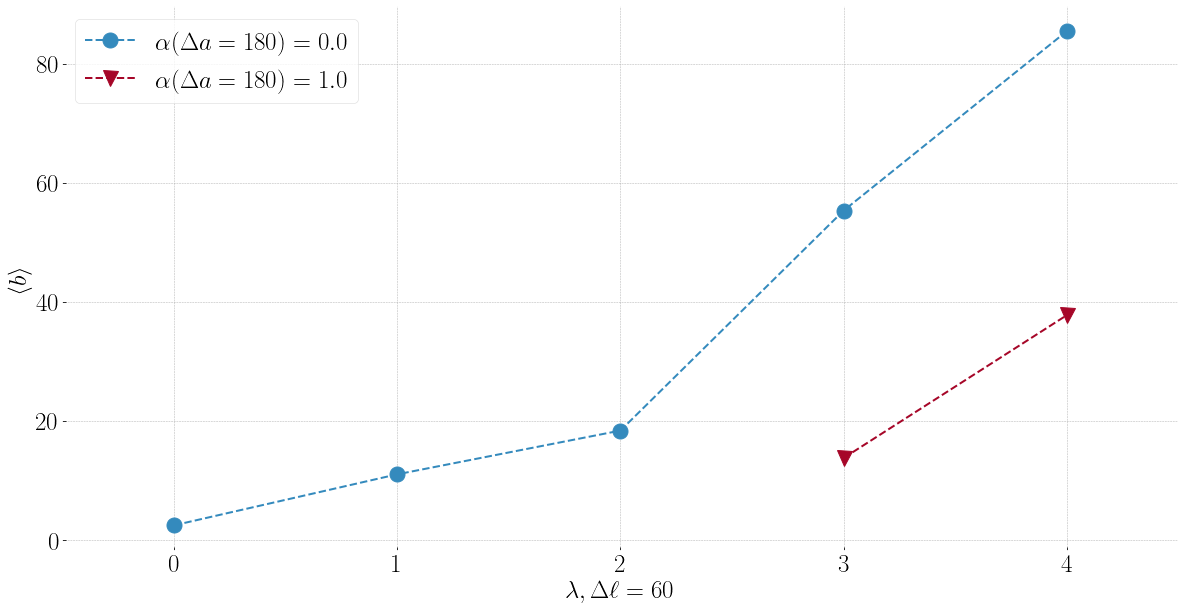

In [17]:
plt.xlabel(r"$\lambda, \Delta \ell = 60$")
plt.ylabel(r"$\langle b \rangle$")
plt.xlim(-0.5, 4.5)
plt.xticks(range(5))
for a in mit_bplot.keys():
    plt.plot(mit_bplot[a].index, mit_bplot[a]['lambda'], marker=markers[int(a)], markersize=15, linestyle="--", label=fr"$\alpha(\Delta a  = 180) = {a}$")
plt.legend()

In [18]:
%time mit_f2 = pc.get_f(mit_calls, 'all', 60, 180)
%time mit_b2 = pc.get_b(mit_f2, 'alpha')
%time mit_bplot2 = pc.plot_g(mit_b2, 'alpha')

/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.sort_values(by='time', inplace=True)
/home/vsvh/docs/GMU/research/comm_patterns_git/phonecalls.py:209: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['alpha'] = df3['aclock'] // bina


CPU times: user 21.4 s, sys: 12.3 ms, total: 21.5 s
Wall time: 21.5 s
CPU times: user 2.61 s, sys: 36.4 ms, total: 2.65 s
Wall time: 2.66 s
CPU times: user 20.6 ms, sys: 24 µs, total: 20.7 ms
Wall time: 20.5 ms


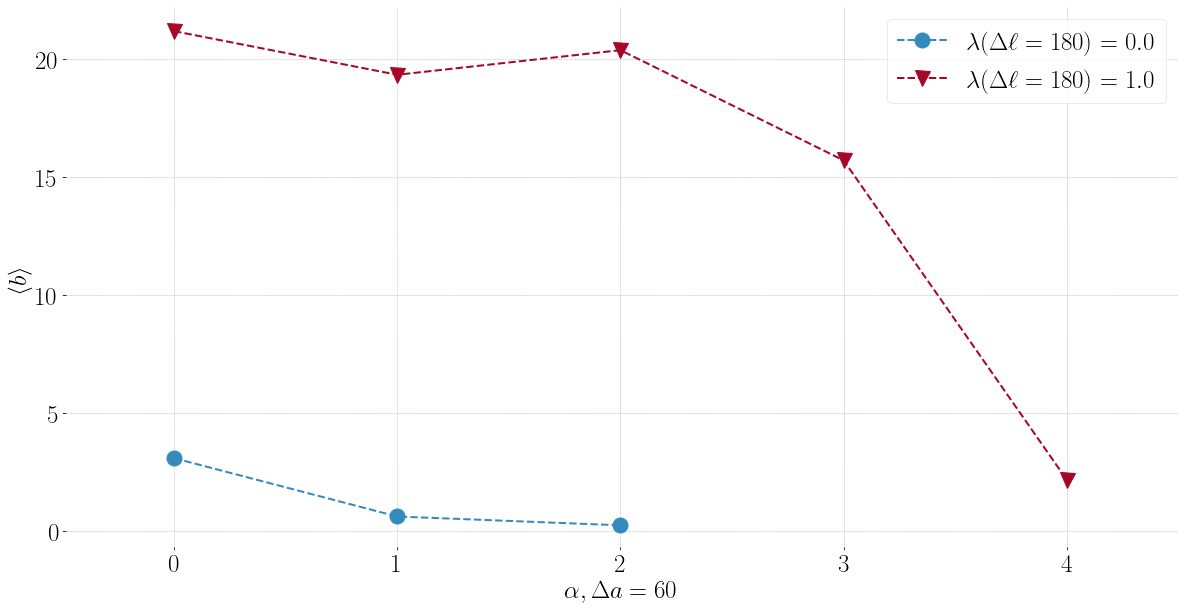

In [19]:
plt.xlabel(r"$\alpha, \Delta a = 60$")
plt.ylabel(r"$\langle b \rangle$")
plt.xlim(-0.5, 4.5)
plt.xticks(range(5))
for a in mit_bplot2.keys():
    plt.plot(mit_bplot2[a].index, mit_bplot2[a]['alpha'], marker=markers[int(a)], markersize=15, linestyle="--", label=fr"$\lambda(\Delta \ell  = 180) = {a}$")
plt.legend()

# Distributions of lifetime separated by $b$

Separated by activity. I will do this as a test using only $b$; but the idea is that evetually I'll use $F$

In [20]:
egolist = list(mit_calls['ego'].unique())

In [21]:
pd.set_option('mode.chained_assignment', None)

In [22]:
%time mit_f = pc.get_f(mit_calls, 'all', 60, 7)

CPU times: user 22.2 s, sys: 23 ms, total: 22.2 s
Wall time: 22.2 s


In [23]:
%time mit_b = pc.get_b(mit_f, 'lambda')

CPU times: user 4.14 s, sys: 3.37 ms, total: 4.14 s
Wall time: 4.15 s


In [24]:
allb = []
for ego in mit_b.keys():
    df = mit_b[ego].loc[mit_b[ego]['alpha'] == 1]
    for i in df.index:
        allb.append(df.at[i, 'g'])
        
[max(allb), min(allb), len(allb)]

[360.0, 0.25, 1182]

(array([651., 234.,  89.,  42.,  36.,  17.,  14.,  11.,  12.,   3.,   9.,
          6.,   4.,   4.,   3.,   0.,   7.,   1.,   2.,   2.,   0.,   3.,
          2.,   2.,   0.,   0.,   0.,   0.,   1.,   3.,   1.,   2.,   1.,
          2.,   1.,   0.,   1.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,
          1.,   0.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([2.500000e-01, 3.847500e+00, 7.445000e+00, 1.104250e+01,
        1.464000e+01, 1.823750e+01, 2.183500e+01, 2.543250e+01,
        2.903000e+01, 3.262750e+01, 3.622500e+01, 3.982250e+01,
        4.342000e+01, 4.701750e+01, 5.061500e+01, 5.421250e+01,
        5.781000e+01, 6.140750e+01, 6.500500e+01, 6.860250e+01

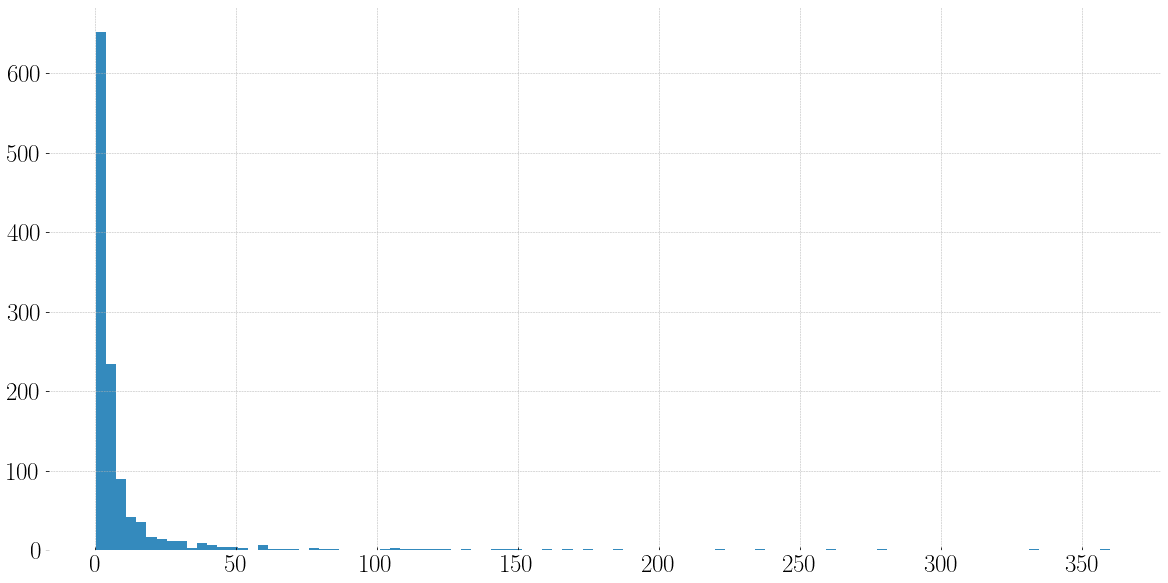

In [25]:
plt.hist(allb, bins=100)

How to decide on the bins for $b$? For now, I will try to arbitrarily choose based on the distribution.

In [26]:
test = {}
for i in range(4):
    test[i] = {}
    
for ego in mit_b.keys():
    df = mit_b[ego].loc[mit_b[ego]['alpha'] == 1]
    for i in df.index:
        lamb = df.at[i, 'lambda']
        b = df.at[i, 'g']
        test[3][lamb] = test[3].get(lamb, 0) + 1
        if b < 17:
            test[0][lamb] = test[0].get(lamb, 0) + 1
        elif (b >= 17) and (b < 34):
            test[1][lamb] = test[1].get(lamb, 0) + 1
        else:
            test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

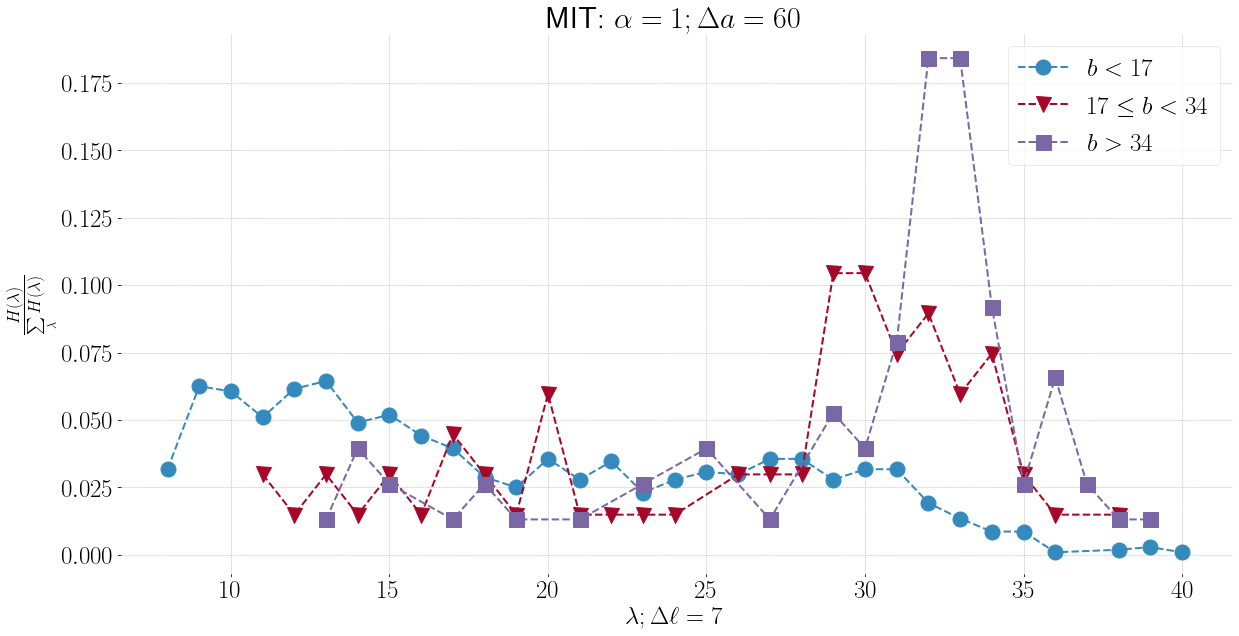

In [27]:
legends = [r"$b < 17$", r"$17 \leq b < 34$", r"$b > 34$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

But I could also choose bins in terms of the perrcentiles (33, 66, 100)

In [28]:
p33, p66 = np.percentile(allb, 33), np.percentile(allb, 66)
test = {}
for i in range(4):
    test[i] = {}
    
for ego in mit_b.keys():
    df = mit_b[ego].loc[mit_b[ego]['alpha'] == 1]
    for i in df.index:
        lamb = df.at[i, 'lambda']
        b = df.at[i, 'g']
        test[3][lamb] = test[3].get(lamb, 0) + 1
        if b < p33:
            test[0][lamb] = test[0].get(lamb, 0) + 1
        elif (b >= p33) and (b < p66):
            test[1][lamb] = test[1].get(lamb, 0) + 1
        else:
            test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

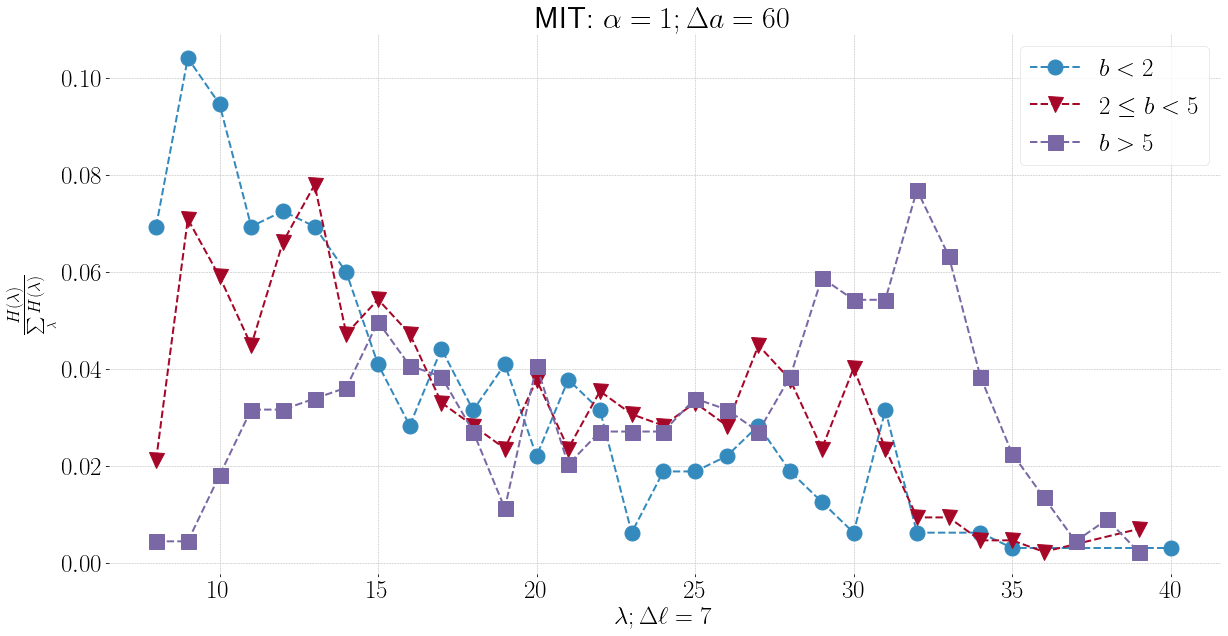

In [29]:
legends = [fr"$b < {int(p33)}$", fr"${int(p33)} \leq b < {int(p66)}$", fr"$b > {int(p66)}$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

## Function to Produce the series

In [30]:
def b_histell(bresult, alpha_fixed, cut_points):
    test = {}
    for i in range(len(cut_points) + 1):
        test[i] = {}

    for ego in bresult.keys():
        df = bresult[ego].loc[bresult[ego]['alpha'] == alpha_fixed]
        for i in df.index:
            lamb = df.at[i, 'lambda']
            b = df.at[i, 'g']
            test[len(cut_points)][lamb] = test[len(cut_points)].get(lamb, 0) + 1
            for c in range(len(cut_points)):
                if (c == 0) and (b < cut_points[0]):
                    test[c][lamb] = test[c].get(lamb, 0) + 1
                elif (c in range(1, len(cut_points) - 1)) and (b >= cut_points[c - 1]) and (b < cut_points[c]):
                    test[c][lamb] = test[c].get(lamb, 0) + 1
                elif (c == len(cut_points) - 1) and  (b >= cut_points[-2]):
                    test[c][lamb] = test[c].get(lamb, 0) + 1

    for i in test.keys():
        test[i] = pd.DataFrame.from_dict(test[i], orient='index')
        test[i].sort_index(inplace=True)
        
    return test

In [31]:
%time mit_bdist = b_histell(mit_b, 1, [np.percentile(allb, p) for p in [33, 66, 100]])

CPU times: user 49.3 ms, sys: 0 ns, total: 49.3 ms
Wall time: 48.3 ms


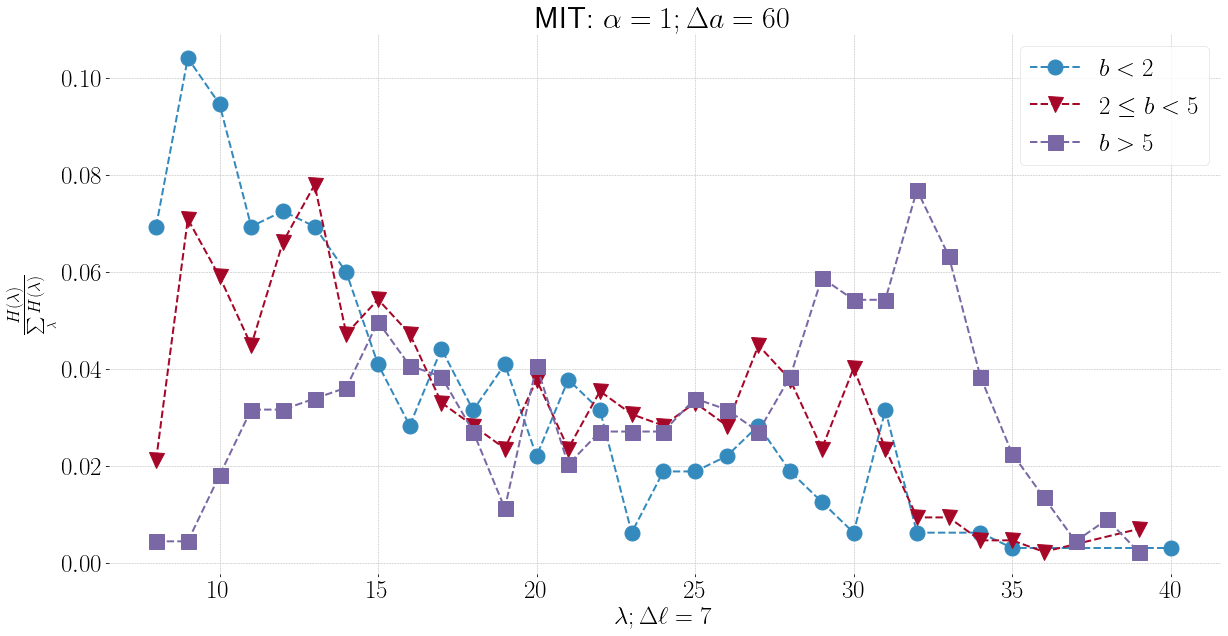

In [32]:
legends = [fr"$b < {int(p33)}$", fr"${int(p33)} \leq b < {int(p66)}$", fr"$b > {int(p66)}$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(len(mit_bdist) - 1):
    plt.plot(mit_bdist[i].index, mit_bdist[i][0] / sum(mit_bdist[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

# Distributions of lifetime separated by $F$

In [33]:
mit_allf = []
for ego in mit_f.keys():
    for alter in mit_f[ego].keys():
        df = mit_f[ego][alter].loc[mit_f[ego][alter]['alpha'] == 1]
        for i in df['lambda']:
            mit_allf.append(i)
        
[max(mit_allf), min(mit_allf), len(mit_allf)]

[40, 8, 1741]

In [34]:
p = [np.percentile(mit_allf, q) for q in (33, 66)]
p

[14.0, 25.0]

(array([ 41.,   0.,   0., 114.,   0.,   0.,  95.,   0.,   0.,  78.,   0.,
          0., 109.,   0.,   0., 112.,   0.,   0.,  80.,   0.,   0.,  85.,
          0.,   0.,   0.,  72.,   0.,   0.,  60.,   0.,   0.,  40.,   0.,
          0.,  35.,   0.,   0.,  48.,   0.,   0.,  44.,   0.,   0.,  52.,
          0.,   0.,  37.,   0.,   0.,   0.,  43.,   0.,   0.,  49.,   0.,
          0.,  50.,   0.,   0.,  61.,   0.,   0.,  50.,   0.,   0.,  56.,
          0.,   0.,  57.,   0.,   0.,  60.,   0.,   0.,   0.,  73.,   0.,
          0.,  52.,   0.,   0.,  36.,   0.,   0.,  25.,   0.,   0.,  12.,
          0.,   0.,   4.,   0.,   0.,   4.,   0.,   0.,   6.,   0.,   0.,
          1.]),
 array([ 8.  ,  8.32,  8.64,  8.96,  9.28,  9.6 ,  9.92, 10.24, 10.56,
        10.88, 11.2 , 11.52, 11.84, 12.16, 12.48, 12.8 , 13.12, 13.44,
        13.76, 14.08, 14.4 , 14.72, 15.04, 15.36, 15.68, 16.  , 16.32,
        16.64, 16.96, 17.28, 17.6 , 17.92, 18.24, 18.56, 18.88, 19.2 ,
        19.52, 19.84, 20.16, 20.48

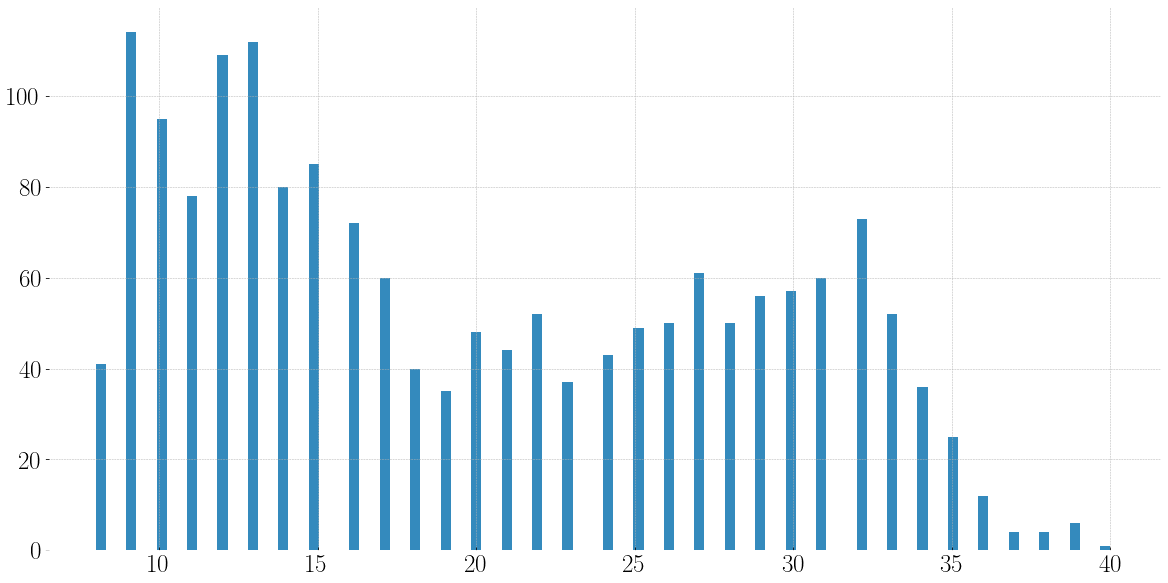

In [35]:
plt.hist(mit_allf, bins=100)

In [36]:
test = {}
for i in range(4):
    test[i] = {}
    
for ego in mit_f.keys():
    for alter in mit_f[ego].keys():
        df = mit_f[ego][alter].loc[mit_f[ego][alter]['alpha'] == 1]
        if len(df) > 0:
            lamb = df.iloc[0]['lambda']
            test[3][lamb] = test[3].get(lamb, 0) + 1
            for f in df['f']:
                if f < p[0]:
                    test[0][lamb] = test[0].get(lamb, 0) + 1
                elif (f >= p[0]) and (f < p[1]):
                    test[1][lamb] = test[1].get(lamb, 0) + 1
                else:
                    test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

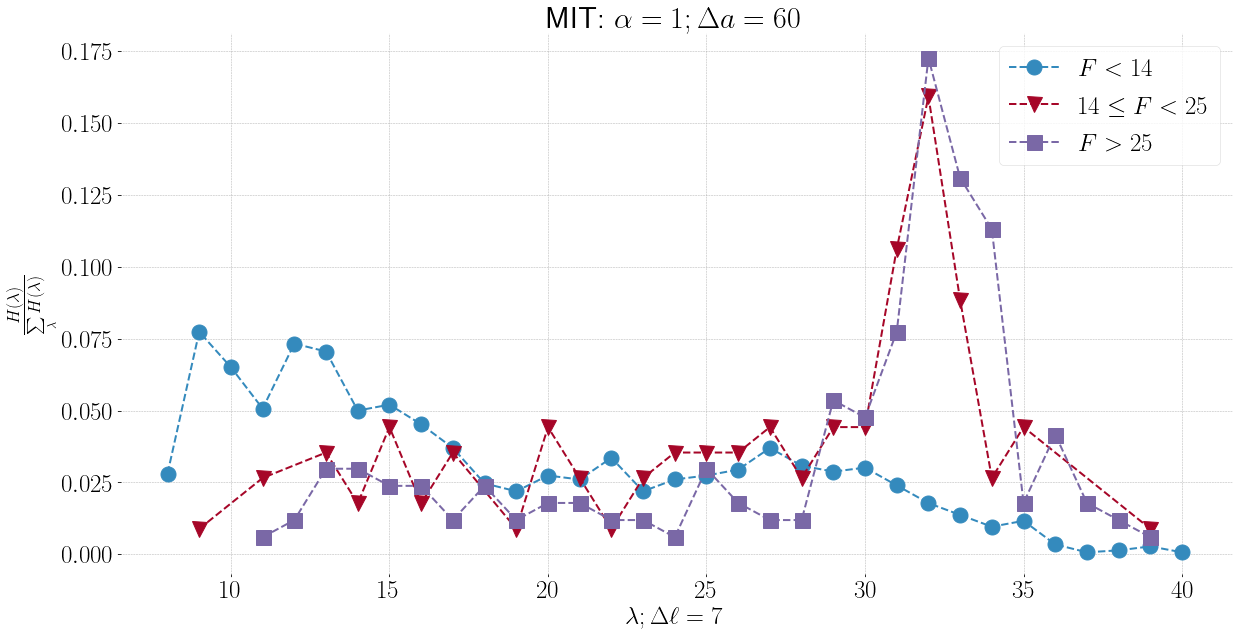

In [37]:
legends = [fr"$F < {int(p[0])}$", fr"${int(p[0])} \leq F < {int(p[1])}$", fr"$F > {int(p[1])}$", r"All $F$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

## Function to produce the series

In [38]:
def f_histell(fresult, alpha_fixed, cut_points):
    n = 1
    test = {}
    for i in range(len(cut_points) + 1):
        test[i] = {}
    for ego in fresult.keys():
        for alter in fresult[ego].keys():
            df = fresult[ego][alter].loc[fresult[ego][alter]['alpha'] == alpha_fixed]
            if len(df) > 0:
                lamb = df.iloc[0]['lambda']
                for f in df['f']:
                    test[len(cut_points)][lamb] = test[len(cut_points)].get(lamb, 0) + 1
                    for c in range(len(cut_points)):
                        if (c == 0) and (f < cut_points[0]):
                            test[c][lamb] = test[c].get(lamb, 0) + 1
                        elif (c in range(1, len(cut_points) - 1)) and (f >= cut_points[c - 1]) and (f < cut_points[c]):
                            test[c][lamb] = test[c].get(lamb, 0) + 1
                        elif (c == len(cut_points) - 1) and  (f >= cut_points[-2]):
                            test[c][lamb] = test[c].get(lamb, 0) + 1
                

    for i in test.keys():
        test[i] = pd.DataFrame.from_dict(test[i], orient='index')
        test[i].sort_index(inplace=True)
        
    return test

In [39]:
%time mit_fdist = f_histell(mit_f, 1, [np.percentile(mit_allf, p) for p in [33, 66, 100]])

CPU times: user 3 s, sys: 3.34 ms, total: 3 s
Wall time: 3 s


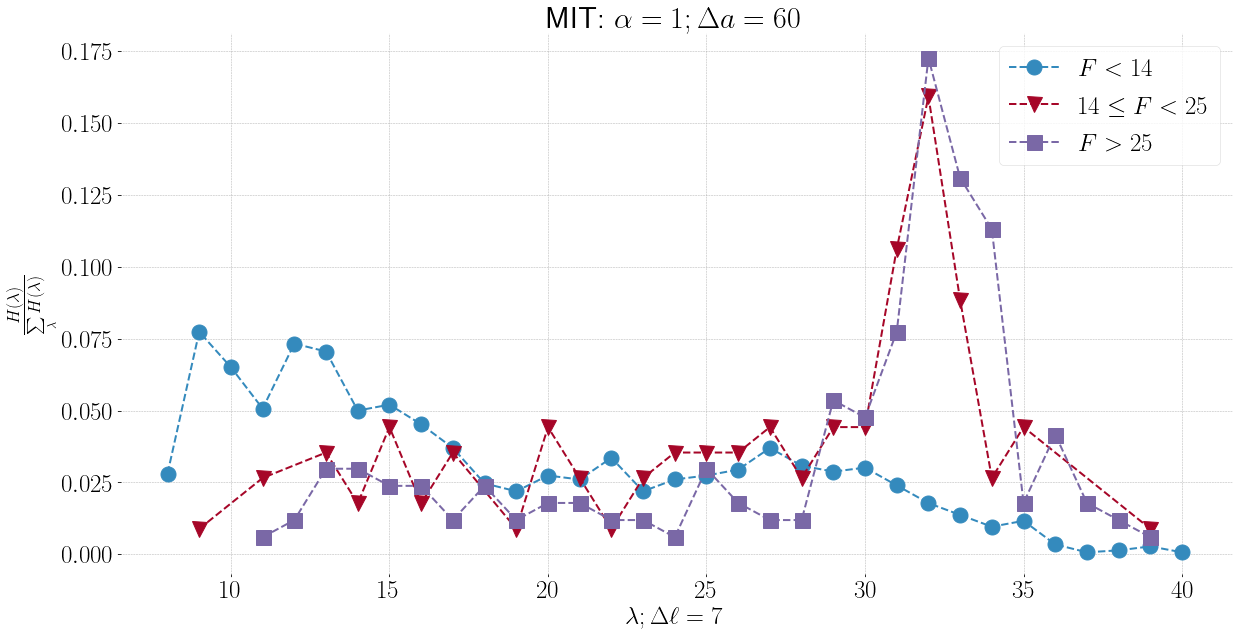

In [40]:
legends = [fr"$F < {int(p[0])}$", fr"${int(p[0])} \leq F < {int(p[1])}$", fr"$F > {int(p[1])}$", r"All $F$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(len(mit_fdist) - 1):
    plt.plot(mit_fdist[i].index, mit_fdist[i][0] / sum(mit_fdist[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

# Limiting data

The first step is to remove all activity from egos in the first 30 days of data. I.e. Remove all phone calls in the first 30 days of **each ego**

In [41]:
tmp = mit_calls.groupby('ego')[['uclock']].min()

In [42]:
tmp.loc[egolist[0]]['uclock'] + 30

43

In [43]:
mit_calls2 = pd.DataFrame()
for ego in mit_calls['ego'].unique():
    df = mit_calls.loc[mit_calls['ego'] == ego]
    minday = tmp.loc[ego]['uclock'] + 30
    df1 = df.loc[df['uclock'] >= minday]
    mit_calls2 = mit_calls2.append(df1).reset_index(drop=True)

In [44]:
tmp = uk1_calls.groupby('ego')[['uclock']].min()
uk1_calls2 = pd.DataFrame()
for ego in uk1_calls['ego'].unique():
    df = uk1_calls.loc[uk1_calls['ego'] == ego]
    minday = tmp.loc[ego]['uclock'] + 30
    df1 = df.loc[df['uclock'] >= minday]
    uk1_calls2 = uk1_calls2.append(df1).reset_index(drop=True)

tmp = uk2_calls.groupby('ego')[['uclock']].min()
uk2_calls2 = pd.DataFrame()
for ego in uk2_calls['ego'].unique():
    df = uk2_calls.loc[uk2_calls['ego'] == ego]
    minday = tmp.loc[ego]['uclock'] + 30
    df1 = df.loc[df['uclock'] >= minday]
    uk2_calls2 = uk2_calls2.append(df1).reset_index(drop=True)

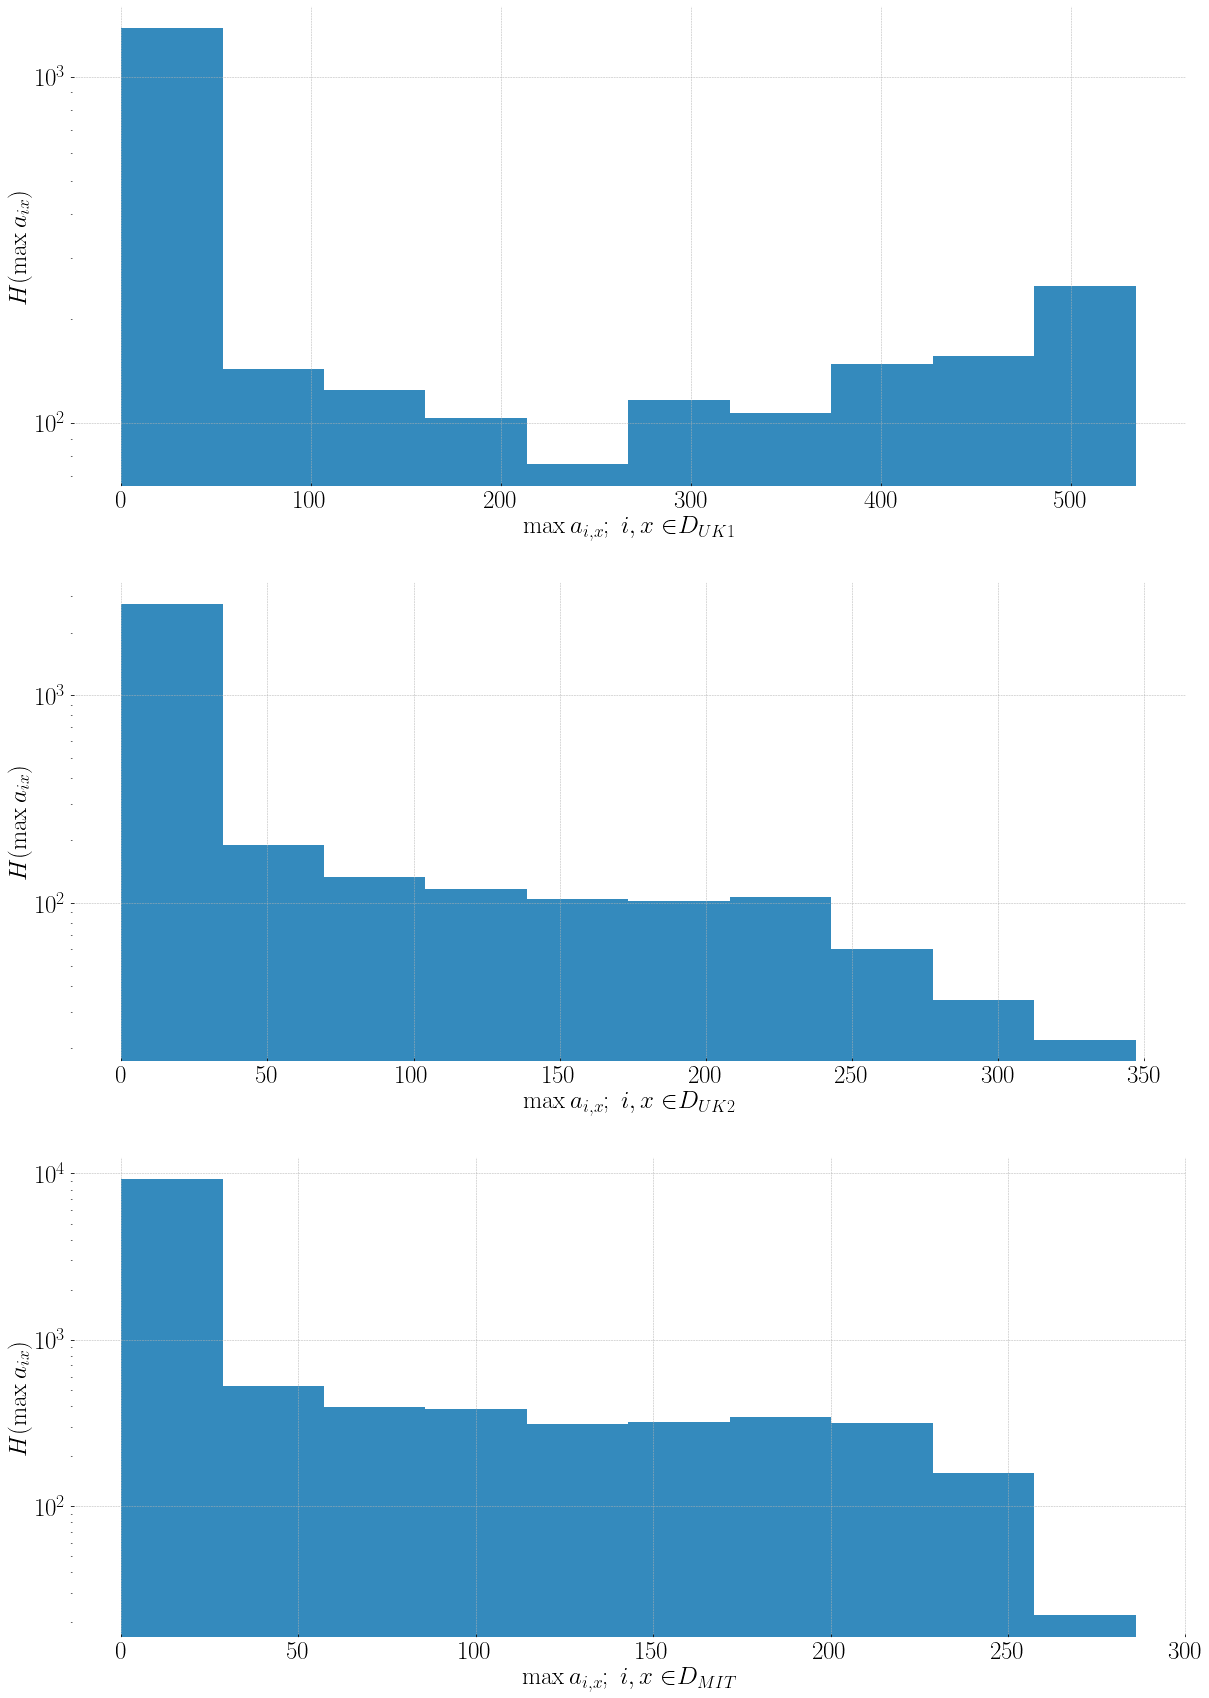

In [45]:
alldata = [uk1_calls2, uk2_calls2, mit_calls2]
xls = r"$\max{a_{i,x}}; \; i, x \in $"
dlab = [r"$D_{UK1}$", r"$D_{UK2}$", r"$D_{MIT}$"]

plt.figure(figsize=(20, 30))
for p in range(len(alldata)):
    plt.subplot(3,1,p + 1)
    plt.xlabel(xls + dlab[p])
    plt.ylabel(r"$H(\max{a_{ix}})$")
    plt.yscale("log")
    plt.hist(alldata[p].groupby(['ego', 'alter'])[['aclock']].max()['aclock'])

Considering the histograms above, I will make all alters to have a relationship with ego of **at most** 300 days.

In [46]:
uk1_calls3 = uk1_calls2.loc[uk1_calls2['aclock'] <= 300]
uk2_calls3 = uk2_calls2.loc[uk2_calls2['aclock'] <= 300]
mit_calls3 = mit_calls2.loc[mit_calls2['aclock'] <= 300]

In [47]:
[max(uk1_calls['uclock']), max(uk2_calls['uclock']), max(mit_calls['uclock'])]

[543, 365, 294]

In [48]:
a = uk2_calls.groupby(['ego', 'alter'])[['uclock']].min()

In [49]:
b = list(a.index)

In [50]:
c = b[0]

In [51]:
a.at[c, 'uclock']

248

In [52]:
uk2_lives['C07779270485']['C01132307972']

{'t0': 192, 'tf': 192, 'nij': 1, 'ell': 0}

In [53]:
timer0 = time.time()
mit_calls4 = pd.DataFrame()
T = max(mit_calls3['uclock'])
for ego in mit_calls3['ego'].unique():
    df = mit_calls3.loc[mit_calls3['ego'] == ego]
    for alter in df['alter'].unique():
        t0 = mit_lives[ego][alter]['t0']
        if t0 <= (T - 300):
            df2 = df.loc[df['alter'] == alter]
            mit_calls4 = mit_calls4.append(df2).reset_index(drop=True)
print(f'This block took {time.time() - timer0}')

This block took 0.5132999420166016


In [54]:
timer0 = time.time()
uk1_calls4 = pd.DataFrame()
T = max(uk1_calls3['uclock'])
for ego in uk1_calls3['ego'].unique():
    df = uk1_calls3.loc[uk1_calls3['ego'] == ego]
    for alter in df['alter'].unique():
        t0 = uk1_lives[ego][alter]['t0']
        if t0 <= (T - 300):
            df2 = df.loc[df['alter'] == alter]
            uk1_calls4 = uk1_calls4.append(df2).reset_index(drop=True)
print(f'This block took {time.time() - timer0}')

This block took 2.9220151901245117


In [55]:
timer0 = time.time()
uk2_calls4 = pd.DataFrame()
T = max(uk2_calls3['uclock'])
for ego in uk2_calls3['ego'].unique():
    df = uk2_calls3.loc[uk2_calls3['ego'] == ego]
    for alter in df['alter'].unique():
        t0 = uk2_lives[ego][alter]['t0']
        if t0 <= (T - 300):
            df2 = df.loc[df['alter'] == alter]
            uk2_calls4 = uk2_calls4.append(df2).reset_index(drop=True)
print(f'This block took {time.time() - timer0}')

This block took 0.6440370082855225


## $\lambda$ distributions by $F$

In [56]:
%time mit_dff = pc.get_f(mit_calls4, 'all', 60, 7)
mit_allf = []
for ego in mit_dff.keys():
    for alter in mit_dff[ego].keys():
        df = mit_dff[ego][alter].loc[mit_dff[ego][alter]['alpha'] == 1]
        for i in df['f']:
            mit_allf.append(i)
        
print([max(mit_allf), min(mit_allf), len(mit_allf)])
p = [np.percentile(mit_allf, q) for q in (33, 66, 100)]
p

KeyError: 'ego'

NameError: name 'mit_dff' is not defined

In [ ]:
%time mit_fdist = f_histell(mit_dff, 1, [2, 6, 494])

In [ ]:
legends = [fr"$F < 2$", fr"$2 \leq F < 6$", fr"$F > 6$", r"All $F$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(mit_fdist[i].index, mit_fdist[i][0] / sum(mit_fdist[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

In [ ]:
%time uk1_dff = pc.get_f(uk1_calls4, 'all', 60, 7)
uk1_allf = []
for ego in uk1_dff.keys():
    for alter in uk1_dff[ego].keys():
        df = uk1_dff[ego][alter].loc[uk1_dff[ego][alter]['alpha'] == 1]
        for i in df['f']:
            uk1_allf.append(i)
        
print([max(uk1_allf), min(uk1_allf), len(uk1_allf)])
p = [np.percentile(uk1_allf, q) for q in (33, 66, 100)]
p

In [ ]:
%time uk1_fdist = f_histell(uk1_dff, 1, p)

In [ ]:
legends = [fr"$F < {p[0]}$", fr"${p[0]} \leq F < {p[1]}$", fr"$F >{p[1]}$", r"All $F$"]
plt.title(r"UK: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(uk1_fdist[i].index, uk1_fdist[i][0] / sum(uk1_fdist[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

In [ ]:
%time uk2_dff = pc.get_f(uk2_calls4, 'all', 60, 7)
uk2_allf = []
for ego in uk2_dff.keys():
    for alter in uk2_dff[ego].keys():
        df = uk2_dff[ego][alter].loc[uk2_dff[ego][alter]['alpha'] == 1]
        for i in df['f']:
            uk2_allf.append(i)
        
print([max(uk2_allf), min(uk2_allf), len(uk2_allf)])
p = [np.percentile(uk1_allf, q) for q in (33, 66, 100)]
p

In [ ]:
%time uk2_fdist = f_histell(uk2_dff, 1, p)

In [ ]:
legends = [fr"$F < {p[0]}$", fr"${p[0]} \leq F < {p[1]}$", fr"$F >{p[1]}$", r"All $F$"]
plt.title(r"UK: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(uk2_fdist[i].index, uk2_fdist[i][0] / sum(uk2_fdist[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

## Changing $F$ groups

It makes the results less clear in MIT, but not in the UK

In [ ]:
p = [10, 15, 20, 1000]
%time mit_fdist2 = f_histell(mit_dff, 1, p)

In [ ]:
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(4):
    plt.plot(mit_fdist2[i].index, mit_fdist2[i][0] / sum(mit_fdist2[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"${p[i]}$")
plt.legend()

In [ ]:
p = [5, 10, 1000]
%time uk1_fdist2 = f_histell(uk1_dff, 1, p)

In [ ]:
legends = [fr"$F < {int(p[0])}$", fr"${int(p[0])} \leq F < {int(p[1])}$", fr"$F > {int(p[1])}$", r"All $F$"]
plt.title(r"$D_{UK1}: \alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(uk1_fdist2[i].index, uk1_fdist2[i][0] / sum(uk1_fdist2[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

In [ ]:
p = [5, 10, 1000]
%time uk2_fdist2 = f_histell(uk2_dff, 1, p)

legends = [fr"$F < {int(p[0])}$", fr"${int(p[0])} \leq F < {int(p[1])}$", fr"$F > {int(p[1])}$", r"All $F$"]
plt.title(r"$D_{UK2}: \alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(uk2_fdist2[i].index, uk2_fdist2[i][0] / sum(uk2_fdist2[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

# Define groups as *calls up to a certain number*

In [ ]:
mit_test = {}
c = [2, 4, 6, 8, 10, 20, 50, 100, 200, 400]
for ego in mit_dff.keys():
    for alter in mit_dff[ego].keys():
        df = mit_dff[ego][alter].loc[mit_dff[ego][alter]['alpha'] == 1]
        if len(df) > 0:
            lamb = df.iloc[0]['lambda']
            #test[3][lamb] = test[3].get(lamb, 0) + 1
            for f in df['f']:
                for cut in c:
                    if f < cut:
                        mit_test[c.index(cut)] = mit_test.get(c.index(cut), {})
                        mit_test[c.index(cut)][lamb] = mit_test[c.index(cut)].get(lamb, 0) + 1
            
for i in mit_test.keys():
    mit_test[i] = pd.DataFrame.from_dict(mit_test[i], orient='index')
    mit_test[i].sort_index(inplace=True)

plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(len(mit_test)):
    plt.plot(mit_test[i].index, mit_test[i][0] / sum(mit_test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F < {c[i]}$")
plt.legend()

In [ ]:
uk_test = {}
c = [2, 4, 6, 8, 10, 20, 30, 50, 100, 200]
for ego in uk_dff.keys():
    for alter in uk_dff[ego].keys():
        df = uk_dff[ego][alter].loc[uk_dff[ego][alter]['alpha'] == 1]
        if len(df) > 0:
            lamb = df.iloc[0]['lambda']
            #test[3][lamb] = test[3].get(lamb, 0) + 1
            for f in df['f']:
                for cut in c:
                    if f < cut:
                        uk_test[c.index(cut)] = uk_test.get(c.index(cut), {})
                        uk_test[c.index(cut)][lamb] = uk_test[c.index(cut)].get(lamb, 0) + 1
            
for i in uk_test.keys():
    uk_test[i] = pd.DataFrame.from_dict(uk_test[i], orient='index')
    uk_test[i].sort_index(inplace=True)

plt.title(r"UK: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(len(uk_test)):
    if i >= len(uk_test) - 3:
        plt.plot(uk_test[i].index, uk_test[i][0] / sum(uk_test[i][0]), marker=markers[i], linestyle="--", markersize=18, label=fr"$F < {c[i]}$")
    else:
        plt.plot(uk_test[i].index, uk_test[i][0] / sum(uk_test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F < {c[i]}$")
plt.legend()

## Update the function

In [ ]:
def f_histell(fresult, alpha_fixed, cut_points, uptoapoint=False):
    test = {}
    if uptoapoint:
        for ego in fresult.keys():
            for alter in fresult[ego].keys():
                df = fresult[ego][alter].loc[fresult[ego][alter]['alpha'] == alpha_fixed]
                if len(df) > 0:
                    lamb = df.iloc[0]['lambda']
                    for f in df['f']:
                        for cut in cut_points:
                            if f < cut:
                                test[cut_points.index(cut)] = test.get(cut_points.index(cut), {})
                                test[cut_points.index(cut)][lamb] = test[cut_points.index(cut)].get(lamb, 0) + 1
                            
    else:
        for i in range(len(cut_points) + 1):
            test[i] = {}
        for ego in fresult.keys():
            for alter in fresult[ego].keys():
                df = fresult[ego][alter].loc[fresult[ego][alter]['alpha'] == alpha_fixed]
                if len(df) > 0:
                    lamb = df.iloc[0]['lambda']
                    for f in df['f']:
                        test[len(cut_points)][lamb] = test[len(cut_points)].get(lamb, 0) + 1
                        for c in range(len(cut_points)):
                            if (c == 0) and (f < cut_points[0]):
                                test[c][lamb] = test[c].get(lamb, 0) + 1
                            elif (c in range(1, len(cut_points) - 1)) and (f >= cut_points[c - 1]) and (f < cut_points[c]):
                                test[c][lamb] = test[c].get(lamb, 0) + 1
                            elif (c == len(cut_points) - 1) and  (f >= cut_points[-2]):
                                test[c][lamb] = test[c].get(lamb, 0) + 1
                

    for i in test.keys():
        test[i] = pd.DataFrame.from_dict(test[i], orient='index')
        test[i].sort_index(inplace=True)
        
    return test

## Certain number of phone calls and more

In [ ]:
mit_test2 = {}
c = [2, 4, 6, 8, 10, 20, 50, 100, 200, 400]
for ego in mit_dff.keys():
    for alter in mit_dff[ego].keys():
        df = mit_dff[ego][alter].loc[mit_dff[ego][alter]['alpha'] == 1]
        if len(df) > 0:
            lamb = df.iloc[0]['lambda']
            #test[3][lamb] = test[3].get(lamb, 0) + 1
            for f in df['f']:
                for cut in c:
                    if f >= cut:
                        mit_test2[c.index(cut)] = mit_test2.get(c.index(cut), {})
                        mit_test2[c.index(cut)][lamb] = mit_test2[c.index(cut)].get(lamb, 0) + 1
            
for i in mit_test2.keys():
    mit_test2[i] = pd.DataFrame.from_dict(mit_test2[i], orient='index')
    mit_test2[i].sort_index(inplace=True)

plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(len(mit_test2)):
    plt.plot(mit_test2[i].index, mit_test2[i][0] / sum(mit_test2[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F \geq {c[i]}$")
plt.legend()

In [ ]:
uk_test2 = {}
c = [2, 4, 6, 8, 10, 20, 30, 50, 100, 200]
for ego in uk_dff.keys():
    for alter in uk_dff[ego].keys():
        df = uk_dff[ego][alter].loc[uk_dff[ego][alter]['alpha'] == 1]
        if len(df) > 0:
            lamb = df.iloc[0]['lambda']
            #test[3][lamb] = test[3].get(lamb, 0) + 1
            for f in df['f']:
                for cut in c:
                    if f >= cut:
                        uk_test2[c.index(cut)] = uk_test2.get(c.index(cut), {})
                        uk_test2[c.index(cut)][lamb] = uk_test2[c.index(cut)].get(lamb, 0) + 1
            
for i in uk_test2.keys():
    uk_test2[i] = pd.DataFrame.from_dict(uk_test2[i], orient='index')
    uk_test2[i].sort_index(inplace=True)

plt.title(r"UK: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(len(uk_test2)):
    if i >= len(uk_test2) - 3:
        plt.plot(uk_test2[i].index, uk_test2[i][0] / sum(uk_test2[i][0]), marker=markers[i], linestyle="--", markersize=18, label=fr"$F \geq {c[i]}$")
    else:
        plt.plot(uk_test2[i].index, uk_test2[i][0] / sum(uk_test2[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F \geq {c[i]}$")
plt.legend()

# Trying modifications to improve results 

## Use $\alpha = 0$ and $\alpha = 2$

In [ ]:
cuk = [2, 4, 6, 8, 10, 20, 30, 50, 100, 200]
uk1_fdist0 = f_histell(uk1_dff, 0, cuk, True)
uk1_fdist1 = f_histell(uk1_dff, 1, cuk, True)
uk1_fdist2 = f_histell(uk1_dff, 2, cuk, True)
uk2_fdist0 = f_histell(uk2_dff, 0, cuk, True)
uk2_fdist1 = f_histell(uk2_dff, 1, cuk, True)
uk2_fdist2 = f_histell(uk2_dff, 2, cuk, True)
cmit = [2, 4, 6, 8, 10, 20, 50, 100, 200, 400]
mit_fdist0 = f_histell(mit_dff, 0, cmit, True)
mit_fdist1 = f_histell(mit_dff, 1, cmit, True)
mit_fdist2 = f_histell(mit_dff, 2, cmit, True)

In [ ]:
7 % 3

In [ ]:
alldata = [uk1_fdist0, uk2_fdist0, mit_fdist0, uk1_fdist1, uk2_fdist1, mit_fdist1, uk1_fdist2, uk2_fdist2, mit_fdist2]

plt.figure(figsize = (36, 24))
for p in range(len(alldata)):
    if p % 3 == 0:
        plt.subplot(3, 3, p + 1)
        data = alldata[p]
        plt.title(fr"UK1: $\alpha = {[0,1,2][p//3]}; \Delta a  = 60$")
        plt.xlabel(r"$\lambda; \Delta \ell = 7$")
        plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
        for i in range(len(data)):
            if i >= len(data) - 3:
                plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=18, label=fr"$F < {cuk[i]}$")
            else:
                plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F < {cuk[i]}$")
        plt.legend()
    elif p % 3 == 1:
        plt.subplot(3, 3, p + 1)
        data = alldata[p]
        plt.title(fr"UK2: $\alpha = {[0,1,2][(p - 1)//3]}; \Delta a  = 60$")
        plt.xlabel(r"$\lambda; \Delta \ell = 7$")
        plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
        for i in range(len(data)):
            if i >= len(data) - 3:
                plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=18, label=fr"$F < {cuk[i]}$")
            else:
                plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F < {cuk[i]}$")
        plt.legend()
    else:
        plt.subplot(3, 3, p + 1)
        data = alldata[p]
        plt.title(fr"MIT: $\alpha = {[0, 1, 2][(p - 2)//3]}; \Delta a  = 60$")
        plt.xlabel(r"$\lambda; \Delta \ell = 7$")
        plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
        for i in range(len(data)):
            if i >= len(data) - 3:
                plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=18, label=fr"$F < {cmit[i]}$")
            else:
                plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr"$F < {cmit[i]}$")
        plt.legend()

## Try $\Delta a = 30$

In [ ]:
uk1_dff2 = pc.get_f(uk1_calls4, 'all', 30, 7)
uk2_dff2 = pc.get_f(uk2_calls4, 'all', 30, 7)
mit_dff2 = pc.get_f(mit_calls4, 'all', 30, 7)

c = [2, 4, 6, 8, 10, 20, 30, 50, 100, 200]

uk1_fdist = []
uk2_fdist = []
mit_fdist = []
for i in range(3):
    uk1_fdist.append(f_histell(uk1_dff2, i, [2, 6, 10, 1000]))
    uk2_fdist.append(f_histell(uk2_dff2, i, [2, 6, 10, 1000]))
    mit_fdist.append(f_histell(mit_dff2, i, [2, 6, 10, 1000]))

In [ ]:
alldata = [uk1_fdist[0], uk2_fdist[0], mit_fdist[0], uk1_fdist[1], uk2_fdist[1], mit_fdist[1], uk1_fdist[2], uk2_fdist[2], mit_fdist[2]]
c = [0, 2, 6, 10, '\infty']

plt.figure(figsize=(36,24))
for p in range(len(alldata)):
    plt.subplot(3, 3, p + 1)
    data = alldata[p]
    plt.title(fr"{['UK1', 'UK2', 'MIT'][p%3]}: $\alpha = {[0,1,2][p%3]}; \Delta a  = 30$")
    plt.xlabel(r"$\lambda; \Delta \ell = 7$")
    plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
    for i in range(len(c) - 1):
        plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[i], linestyle="--", markersize=15, label=fr'${c[i]} \leq F < {c[i + 1]}$')
    plt.legend()

## Use bins of $F$ for the series

I will introduce the quantity $\phi(F)$, defined as

$$ \phi(F) = \left\lfloor \frac{F}{\Delta F}\right\rfloor$$

To test it, I will include them into each dataset

In [ ]:
a = [2, 4, 6, 100]
b = [0] + a

In [ ]:
for i in range(len(b) - 1):
    print((b[i], b[i + 1]))

In [ ]:
def f_histell(fresult, alpha_fixed, cut_points, uptoapoint=False, binned=False, deltaF=5):
    test = {}
    if uptoapoint:
        for ego in fresult.keys():
            for alter in fresult[ego].keys():
                df = fresult[ego][alter].loc[fresult[ego][alter]['alpha'] == alpha_fixed]
                if len(df) > 0:
                    lamb = df.iloc[0]['lambda']
                    for f in df['f']:
                        for cut in cut_points:
                            if f < cut:
                                df2 = df.loc[df['f'] < cut]
                                test[cut_points.index(cut)] = test.get(cut_points.index(cut), {})
                                test[cut_points.index(cut)][lamb] = test[cut_points.index(cut)].get(lamb, 0) + sum(df2['f'])
                                
    elif binned:
        for ego in fresult.keys():
            for alter in fresult[ego].keys():
                fresult[ego][alter]['phi'] = fresult[ego][alter]['f'] // deltaF
                df = fresult[ego][alter].loc[fresult[ego][alter]['alpha'] == alpha_fixed]
                if len(df) > 0:
                    lamb = df.iloc[0]['lambda']
                    for phi in df['phi'].unique():
                        df2 = df.loc[df['phi'] == phi]
                        test[phi] = test.get(phi, {})
                        test[phi][lamb] = test[phi].get(lamb, 0) + sum(df2['f'])
                        #test[phi][lamb] = test[phi].get(lamb, 0) + 1
                
                            
    else:
        cutp = [0] + cut_points
        for ego in fresult.keys():
            for alter in fresult[ego].keys():
                df = fresult[ego][alter].loc[fresult[ego][alter]['alpha'] == alpha_fixed]
                if len(df) > 0:
                    lamb = df.iloc[0]['lambda']
                    for i in range(len(cutp) - 1):
                        df2 = df.loc[(df['f'] >= cutp[i]) & (df['f'] < cutp[i + 1])]
                        test[i] = test.get(i, {})
                        test[i][lamb] = test[i].get(lamb, 0) + sum(df2['f'])
                        

    for i in test.keys():
        test[i] = pd.DataFrame.from_dict(test[i], orient='index')
        test[i].sort_index(inplace=True)
        
    return test

In [ ]:
uk1_fdist = f_histell(uk1_dff, 1, [], binned=True, deltaF=10)
uk2_fdist = f_histell(uk2_dff, 1, [], binned=True, deltaF=10)
mit_fdist = f_histell(mit_dff, 1, [], binned=True, deltaF=10)

In [ ]:
alldata = [uk1_fdist, uk2_fdist, mit_fdist]
plt.figure(figsize=(20, 30))
for p in range(len(alldata)):
    data = alldata[p]
    dataseries = sorted(list(data.keys()))[:10]
    #dataseries += sorted(list(data.keys()))[-3:]
    plt.subplot(3,1,p + 1)
    plt.title(fr"{['UK1', 'UK2', 'MIT'][p]}: $\alpha = {[0,1,2][p]}; \Delta a  = 60$")
    plt.xlabel(r"$\lambda; \Delta \ell = 7$")
    plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
    idx = 0
    for i in dataseries:
        plt.plot(data[i].index, data[i][0] / sum(data[i][0]), marker=markers[idx], linestyle="--", markersize=15, label=fr"$\phi = {i}; \Delta F = 10$")
        idx += 1
    plt.legend()

# Using the same dataset as above, but now with $b$

The dataset used in the previous plot contains all calls starting 1 month after ego appeared; and all alters limited to $a \leq 200$

In [ ]:
%time dfb = pc.get_b(dff, 'lambda')

In [ ]:
allb = []
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        allb.append(df.at[i, 'g'])
        
print([max(allb), min(allb), len(allb)])
plt.hist(allb, bins=100)

In [ ]:
p33, p66 = np.percentile(allb, 33), np.percentile(allb, 66)
test = {}
for i in range(4):
    test[i] = {}
    
for ego in blamb.keys():
    df = blamb[ego].loc[blamb[ego]['alpha'] == 1]
    for i in df.index:
        lamb = df.at[i, 'lambda']
        b = df.at[i, 'g']
        test[3][lamb] = test[3].get(lamb, 0) + 1
        if b < p33:
            test[0][lamb] = test[0].get(lamb, 0) + 1
        elif (b >= p33) and (b < p66):
            test[1][lamb] = test[1].get(lamb, 0) + 1
        else:
            test[2][lamb] = test[2].get(lamb, 0) + 1

for i in test.keys():
    test[i] = pd.DataFrame.from_dict(test[i], orient='index')
    test[i].sort_index(inplace=True)

In [ ]:
legends = [fr"$b < {int(p33)}$", fr"${int(p33)} \leq b < {int(p66)}$", fr"$b > {int(p66)}$", r"All $b$"]
plt.title(r"MIT: $\alpha = 1; \Delta a  = 60$")
plt.xlabel(r"$\lambda; \Delta \ell = 7$")
plt.ylabel(r"$\frac{H(\lambda)}{\sum\limits_{\lambda} H(\lambda)}$")
for i in range(3):
    plt.plot(test[i].index, test[i][0] / sum(test[i][0]), marker=markers[i], linestyle="--", markersize=15, label=legends[i])
plt.legend()

# Testing functions

In [ ]:
def get_f(callsdf, theego, lives_dict, bina, binell):
    '''
    This method outputs a dataframe with one row per (a, ell) combination, and the number
    of phone calls ego made to alters with that combination of parameters. The arguments are
    callsdf             : a dataframe produces with the "allcalls" or "remove_alters" methods
    theego              : specify an ego for results only using it. If the 'all' argument is
                        passed, it will calculate a dataframe per ego
    lives_dict          : dictionary produces with the "lives_dictionary" method
    bina                : the value for \Delta a
    binell              : \Delta ell
    '''
    if theego != 'all':
        df1 = callsdf.loc[callsdf['ego'] == theego]
    else:
        df1 = copy.deepcopy(callsdf)

    f = {}
    for ego in df1['ego'].unique():
        f[ego] = {}
        df2 = df1.loc[df1['ego'] == ego]
        for alter in df2['alter'].unique():
            f[ego][alter] = pd.DataFrame()
            df3 = df2.loc[df2['alter'] == alter]
            alla = set([i // bina for i in df3['aclock'].unique()])
            lamb = lives_dict[ego][alter]['ell'] // binell
            idx = 0
            for a in alla:
                f[ego][alter].at[idx, 'lamb'] = lamb
                f[ego][alter].at[idx, 'alpha'] = a
                idx += 1
            f[ego][alter]['f'] = 0
            for c in df3.index:
                a = df3.at[c, 'aclock']  // bina
                iidx = list(f[ego][alter].loc[f[ego][alter]['alpha'] == a].index)[0]
                f[ego][alter].at[iidx, 'f'] += 1

    return f

In [ ]:
%time aaa = get_f(mit_calls, 'all', mit_lives, 60, 7)

In [ ]:
counter = 0
for ego in aaa.keys():
    for alter in aaa[ego].keys():
        df = aaa[ego][alter]
        print(list(df['lamb']))
        counter += 1
        if counter == 20:
            break
    if counter  == 20:
        break

In [ ]:
def get_f2(callsdf, theego, bina, binell):
    '''
    This method outputs a dataframe with one row per (a, ell) combination, and the number
    of phone calls ego made to alters with that combination of parameters. The arguments are

    callsdf             : a dataframe produces with the "allcalls" or "remove_alters" methods
    theego              : specify an ego for results only using it. If the 'all' argument is
                        passed, it will calculate a dataframe per ego
    lives_dict          : dictionary produces with the "lives_dictionary" method
    bina                : the value for \Delta a
    binell              : \Delta ell
    '''
    if theego != 'all':
        df1 = callsdf.loc[callsdf['ego'] == theego]
    else:
        df1 = callsdf.copy()

    f = {}
    for ego in df1['ego'].unique():
        f[ego] = {}
        df2 = df1.loc[df1['ego'] == ego]
        for alter in df2['alter'].unique():
            df3 = df2.loc[df2['alter'] == alter]
            df3.sort_values(by='time', inplace=True)
            lamb = (df3.iloc[-1]['uclock'] - df3.iloc[0]['uclock']) // binell
            df3['alpha'] = df3['aclock'] // bina
            tmp = df3.groupby('alpha').size()
            f[ego][alter] = pd.DataFrame({'lambda': lamb, 'alpha': tmp.index, 'f': tmp})
            f[ego][alter].reset_index(drop=True, inplace=True)
    return f

In [ ]:
%time bbb = get_f2(mit_calls, 'all', 60, 7)

In [ ]:
counter = 0
for ego in bbb.keys():
    for alter in bbb[ego].keys():
        df = bbb[ego][alter]
        print(list(df['lambda']))
        counter += 1
        if counter == 20:
            break
    if counter  == 20:
        break

In [ ]:
a = mit_calls.groupby(['ego', 'alter'])[['aclock']].min().rename(columns={'aclock': 't0'})
b = mit_calls.groupby(['ego', 'alter'])[['aclock']].max().rename(columns={'aclock': 'tf'})

In [ ]:
c = mit_calls.groupby(['ego', 'alter'])[['aclock']].count().rename(columns={'aclock': 'nij'})

In [ ]:
d = a.merge(b, left_index=True, right_index=True)
d = d.merge(c, left_index=True, right_index=True)

In [ ]:
d['ell'] = d['tf'] - d['t0']

In [ ]:
%time aaa = pc.lives_dictionary(mit_calls)

In [ ]:
%time bbb = ld(mit_calls)

In [ ]:
aaa[egolist[0]][alist[1]]

In [ ]:
bbb[egolist[0]][alist[1]]['ell']

In [ ]:
alist = list(fall[egolist[0]].keys())
fall[egolist[0]][alist[1]]

In [ ]:
aa = pd.DataFrame({1: ['a', 'a', 'b', 'c', 'c', 'c'], 2: 'hhhh', 3: list(range(6))})
aa

In [ ]:
bb = pd.DataFrame({1:['e', 'e', 'e', 'f', 'g', 'g', 'g'], 2: 'rock', 3:list(range(6, 13))})

In [ ]:
aa = aa.append(bb).reset_index(drop=True)
aa

In [ ]:
aa.groupby(1)